In [2]:
import json
import typing as tp

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from matplotlib.figure import Figure

In [3]:
categories_df_path = "RU_category_id.json"

In [4]:
trends_df = pd.read_csv('RUvideos_short.csv', sep=',', parse_dates=['trending_date'], dayfirst=True)
trends_df['trending_date'] = pd.to_datetime(trends_df['trending_date'], format='%y.%d.%m')
trends_df['trending_date'] = pd.to_datetime(trends_df.trending_date)
trends_df.head()

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description
0,gDuslQ9avLc,2017-11-14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними..."
1,AOCJIFEA_jE,2017-11-14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир..."
2,VAWNQDgwwOM,2017-11-14,ХАЙП КЭМП - СВОЙ СРЕДИ ЧУЖИХ,Юлик,24,2017-11-13T16:11:31.000Z,"юмор|""комедия""|""влог""|""блог""|""смешно""|""смешное...",424596,49854,714,2944,https://i.ytimg.com/vi/VAWNQDgwwOM/default.jpg,False,False,False,http://kapitany.ru/!Yulik.cap - Факультет #Кап...
3,gknkFwKQfHg,2017-11-14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома
4,3sYvZcwzZr8,2017-11-14,КЛИПЫ РОДИТЕЛЕЙ НА ШКОЛЬНЫЙ ВЫПУСКНОЙ,Совергон,24,2017-11-13T16:52:36.000Z,"Совергон|""Sovergon""|""клипы""|""родители""|""школа""...",243469,36216,631,1692,https://i.ytimg.com/vi/3sYvZcwzZr8/default.jpg,False,False,False,❏ КОНКУРС КАПИТАНЫ: http://kapitany.ru/!Soverg...


In [5]:
with open(categories_df_path) as json_file:
    json_data = json.load(json_file)

categories_df = pd.DataFrame(columns=['id', 'name'])

for item in json_data['items']:
    categories_df = categories_df.append(
        {'id': int(item['id']),
         'name': item['snippet']['title']},
        ignore_index=True
    )
categories_df['id'] = categories_df['id'].astype(int)

/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_19797/807120156.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = categories_df.append(
/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_19797/807120156.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = categories_df.append(
/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_19797/807120156.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = categories_df.append(
/var/folders/1w/v_pdz1hx607dnqpw4pt35zlm0000gn/T/ipykernel_19797/807120156.py:7: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  categories_df = catego

In [6]:
categories_df

,id,name
0,1,Film & Animation
1,2,Autos & Vehicles
2,10,Music
3,15,Pets & Animals
4,17,Sports
5,18,Short Movies
6,19,Travel & Events
7,20,Gaming
8,21,Videoblogging
9,22,People & Blogs


In [13]:
new_df = trends_df.merge(categories_df, how='inner', left_on='category_id', right_on='id')
new_df['trending_date'] = new_df['trending_date'].dt.day
new_df

,video_id,trending_date,title,channel_title,category_id,publish_time,tags,views,likes,dislikes,comment_count,thumbnail_link,comments_disabled,ratings_disabled,video_error_or_removed,description,id,name
0,gDuslQ9avLc,14,Захар и Полина учатся экономить,Т—Ж БОГАЧ,22,2017-11-13T09:09:31.000Z,"захар и полина|""учимся экономить""|""копить день...",62408,334,190,50,https://i.ytimg.com/vi/gDuslQ9avLc/default.jpg,False,False,False,"Знакомьтесь, это Захар и Полина. Вместе с ними...",22,People & Blogs
1,AOCJIFEA_jE,14,Биржа Мемов #29. Большой выпуск,Druzhko Show,22,2017-11-13T17:32:11.000Z,"биржа мемов|""лев шагинян""|""мемы""|""пикчи""|""друж...",330043,43841,2244,2977,https://i.ytimg.com/vi/AOCJIFEA_jE/default.jpg,False,False,False,"В 29 выпуске Дружко Шоу Сергей сказал, что Бир...",22,People & Blogs
2,gknkFwKQfHg,14,Сочная кесадилья с курицей,Hochland,22,2017-11-13T06:51:10.000Z,"хохланд|""сыр""|""рецепты""|""как приготовить""|""вку...",112851,3566,122,80,https://i.ytimg.com/vi/gknkFwKQfHg/default.jpg,False,False,False,*** как готовить ресторанные блюда дома,22,People & Blogs
3,TZdNwUSgRHc,14,"РПЦ незаконно строит храм, полиция смотрит как...",Нет застройке без согласия,22,2017-11-13T06:29:09.000Z,[none],97006,2259,330,887,https://i.ytimg.com/vi/TZdNwUSgRHc/default.jpg,False,False,False,"Строители нападают на муниципального депутата,...",22,People & Blogs
4,ss0q7YJ8weU,14,5 антиЛАЙФХАКОВ без которых жизнь невозможна!,DIPT,22,2017-11-13T15:49:05.000Z,"лайфхаки|""дипт""|""dipt""|""антилайфхаки""|""лайфхак...",148974,5434,5247,1612,https://i.ytimg.com/vi/ss0q7YJ8weU/default.jpg,False,False,False,Инвестируй - https://binary-monster.com/ \nВс...,22,People & Blogs
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1516,SFsnUioBIDM,19,Бездомные коты и достопримечательности Рима! О...,Орел и Решка,19,2017-11-18T13:58:24.000Z,"орел и решка перезагрузка|""орел и решка рим""|""...",9211,325,14,31,https://i.ytimg.com/vi/SFsnUioBIDM/default.jpg,False,False,False,Когда Орёл и Решка посетили столицу Италии - г...,19,Travel & Events
1517,jLZ-MRskz_I,20,Таиланд Симиланы. Дайвинг. Улица Красных Фонарей,Alexander Kondrashov,19,2017-11-19T16:22:49.000Z,"александр кондрашов|""путешествия""|""влоги""|""пут...",135817,5714,331,781,https://i.ytimg.com/vi/jLZ-MRskz_I/default.jpg,False,False,False,Инстаграм - instagram.com/phuketcheaptour\nКан...,19,Travel & Events
1518,wMN1UiqAaOY,20,Мадрид. Орёл и Решка. Перезагрузка. RUS,Орел и Решка,19,2017-11-19T09:28:52.000Z,"орел и решка перезагрузка|""орел и решка мадрид...",44074,883,36,152,https://i.ytimg.com/vi/wMN1UiqAaOY/default.jpg,False,False,False,Орёл и Решка. Перезагрузка в столице Испании -...,19,Travel & Events
1519,dqGPBMVgVMQ,20,🔴 АШАН. КРЫМ. Что на полках в Ашане? Цены в Кр...,КРЫМ ГЛАЗАМИ МЕСТНЫХ,19,2017-11-19T06:05:58.000Z,"ашан|""крым""|""Крым""|""Крым 2017""|""Крым сегодня""|...",6985,306,16,317,https://i.ytimg.com/vi/dqGPBMVgVMQ/default.jpg,False,False,False,"Всем привет! Сегодня в видео гипермаркет АШАН,...",19,Travel & Events


In [15]:
result_table = pd.pivot_table(new_df, columns='trending_date', values='views', index='name', aggfunc=np.sum).div(1000000)
result_table

trending_date,14,15,16,17,18,19,20,21
name,,,,,,,,
Autos & Vehicles,1.350890,2.076443,2.051608,1.386676,1.713087,1.736740,0.962761,1.421017
Comedy,2.310887,4.152389,4.156893,3.556025,3.806238,3.556578,5.648120,4.627423
Education,0.139723,0.028850,0.006963,0.146943,0.256076,0.310830,0.270585,0.186909
Entertainment,5.010384,5.289490,3.373346,12.299938,7.519942,5.877590,8.174020,4.585563
Film & Animation,0.636616,0.931837,1.160112,1.820958,2.725012,1.075440,2.574276,2.532978
Gaming,0.885597,1.609621,1.583149,0.557074,0.600307,0.193316,0.851814,0.981217
Howto & Style,2.191619,1.562421,0.129763,1.250164,1.468139,0.156958,1.402284,0.350009
Music,0.733907,1.585619,4.720464,9.179397,6.972429,1.329904,1.527219,0.809274
News & Politics,1.010044,1.225112,1.174092,1.251367,1.056007,1.028665,0.657263,1.214178


Text(52.31597222222221, 0.5, 'Категория')

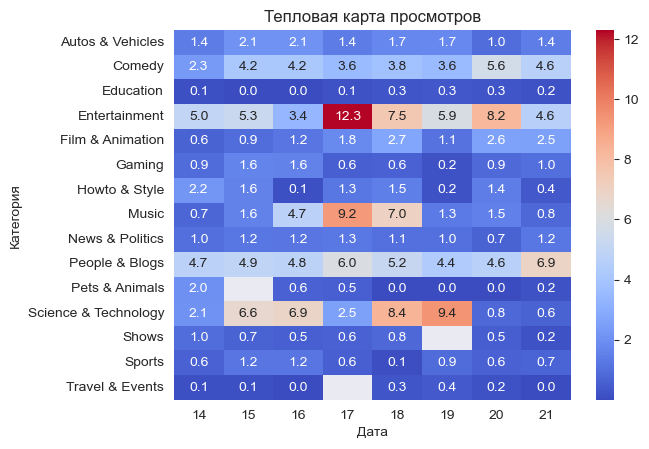

In [18]:
sns.heatmap(result_table, cmap= 'coolwarm', annot=True, fmt='.1f')
plt.title("Тепловая карта просмотров")
plt.xlabel('Дата')
plt.ylabel('Категория')

In [10]:
result_table['Всего просмотров'] = result_table.sum(axis=1)
result_table.loc['Всего просмотров'] = result_table.sum()
result_table

trending_date,14,15,16,17,18,19,20,21,Всего просмотров
name,,,,,,,,,
Autos & Vehicles,1.350890,2.076443,2.051608,1.386676,1.713087,1.736740,0.962761,1.421017,12.699222
Comedy,2.310887,4.152389,4.156893,3.556025,3.806238,3.556578,5.648120,4.627423,31.814553
Education,0.139723,0.028850,0.006963,0.146943,0.256076,0.310830,0.270585,0.186909,1.346879
Entertainment,5.010384,5.289490,3.373346,12.299938,7.519942,5.877590,8.174020,4.585563,52.130273
Film & Animation,0.636616,0.931837,1.160112,1.820958,2.725012,1.075440,2.574276,2.532978,13.457229
Gaming,0.885597,1.609621,1.583149,0.557074,0.600307,0.193316,0.851814,0.981217,7.262095
Howto & Style,2.191619,1.562421,0.129763,1.250164,1.468139,0.156958,1.402284,0.350009,8.511357
Music,0.733907,1.585619,4.720464,9.179397,6.972429,1.329904,1.527219,0.809274,26.858213
News & Politics,1.010044,1.225112,1.174092,1.251367,1.056007,1.028665,0.657263,1.214178,8.616728


Text(52.31597222222221, 0.5, 'Категория')

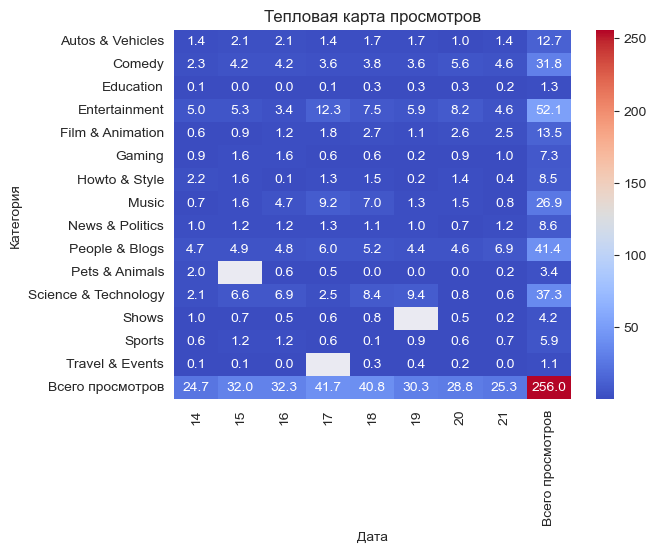

In [11]:
sns.heatmap(result_table, cmap= 'coolwarm', annot=True, fmt='.1f')
plt.title("Тепловая карта просмотров")
plt.xlabel('Дата')
plt.ylabel('Категория')

Text(52.31597222222221, 0.5, 'Категория')

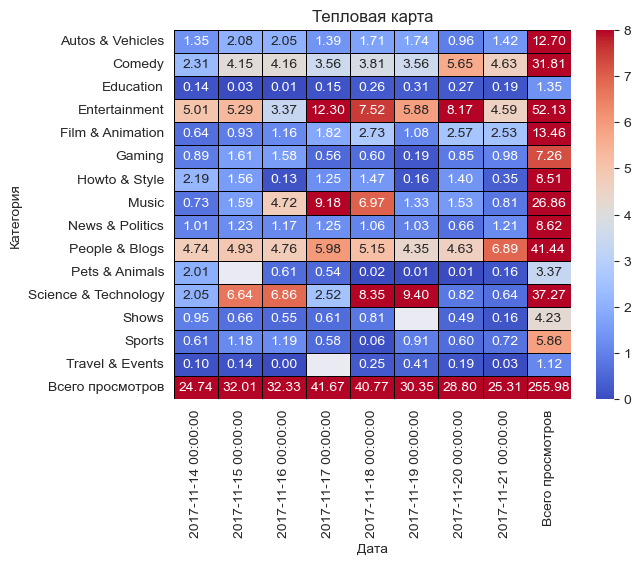

In [12]:
new_df = trends_df.merge(categories_df, how='inner', left_on='category_id', right_on='id')
result_table = pd.pivot_table(new_df, columns='trending_date', values='views', index='name', aggfunc=np.sum).div(1000000)
result_table['Всего просмотров'] = result_table.sum(axis=1)
result_table.loc['Всего просмотров'] = result_table.sum()
sns.heatmap(result_table, annot=True, fmt='.2f', linewidths=.5, vmax=8, vmin=0, cmap='coolwarm', linecolor='black')
plt.title("Тепловая карта")
plt.xlabel('Дата')
plt.ylabel('Категория')